# Solving LPP using Graphical Method
- The graphical method program will go through all the points of the basic feasible shaded region.
- It handles both max and min type problems.
- It can only handle problems where there are two decision variables involved, as it is a 2D graph.

### Problem 1
A furniture company produces inexpensive tables and chairs. The production process for each is similar in that
both require a certain number of hours of carpentry work and a certain number of labour hours in the painting
department. Each table takes 4 hours of carpentry and 2 hours in the painting department. Each chair requires 3
hours of carpentry and 1 hour in the painting department. During the current production period, 240 hours of
carpentry time are available and 100 hours in painting is available. Each table sold yields a profit of E7; each
chair produced is sold for a E5 profit. Find the best combination of tables and chairs to manufacture in order to
reach the maximum profit.

**Mathematical Formulation**
Let x be no of tables to be produced and y be no of chairs.  
Max Z = 7x + 5y    
Subject to   
4x + 3y <= 240  
2x + y <= 100  
x, y >= 0  

Enter a and b of Objective Function(Z = ax + by):  7 5
Enter type of LPP(Max/Min):  max
Enter number of constraints:  2
Enter coeff. of x, y and RHS:  4 3 240
Enter coeff. of x, y and RHS:  2 1 100


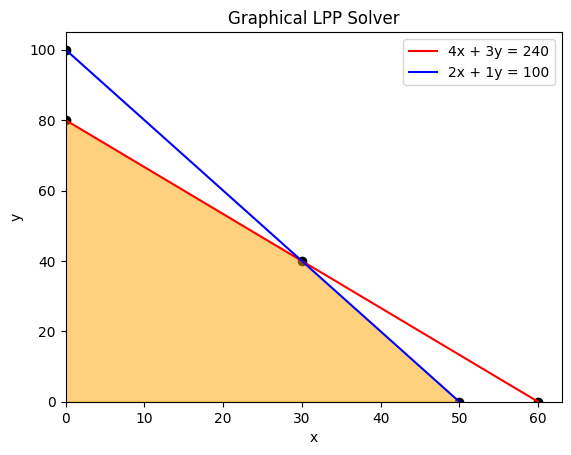

In [2]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Point
import itertools
import numpy as np

a, b = map(int, input("Enter a and b of Objective Function(Z = ax + by): ").split())
t = input("Enter type of LPP(Max/Min): ").lower()
n = int(input("Enter number of constraints: "))
constraints = []
for _ in range(n):
    constraints.append(tuple(map(int, input("Enter coeff. of x, y and RHS: ").split())))

lines = []
points = [(0, 0)]  # Include origin as a possible feasible point
colors = ['red', 'blue', 'green', 'violet']
for i, eqn in enumerate(constraints):
    color = colors[i]
    c, d, rhs = eqn
    if c == 0:
        y_intercept = rhs / d
        plt.axhline(y=y_intercept, color = color, label=f"{d}y = {rhs}")
        plt.scatter(0, y_intercept, color="black")
        lines.append(LineString([(0, y_intercept), (2 * y_intercept, y_intercept)]))
        points.append((0, y_intercept))
    elif d == 0:
        x_intercept = rhs / c
        plt.axvline(x=x_intercept, color = color, label=f"{c}x = {rhs}")
        plt.scatter(x_intercept, 0, color="black")
        lines.append(LineString([(x_intercept, 0), (x_intercept, 2 * x_intercept)]))
        points.append((x_intercept, 0))
    else:
        x_intercept = rhs / c
        y_intercept = rhs / d
        plt.plot((0, x_intercept), (y_intercept, 0), color = color, label=f"{c}x + {d}y = {rhs}")
        plt.scatter(0, y_intercept, color="black")
        plt.scatter(x_intercept, 0, color="black")
        lines.append(LineString([(0, y_intercept), (x_intercept, 0)]))
        points.append((0, y_intercept))
        points.append((x_intercept, 0))

intersections = []
for line1, line2 in itertools.combinations(lines, 2):
    intersection = line1.intersection(line2)
    if intersection.is_empty or not hasattr(intersection, "x"):
        continue
    if intersection.x >= 0 and intersection.y >= 0:
        intersections.append((intersection.x, intersection.y))
        plt.scatter(intersection.x, intersection.y, color="black")

# Keep only feasible points
feasible_points = []
for point in points + intersections:
    if t == "max":
        if all(c * point[0] + d * point[1] <= rhs for c, d, rhs in constraints):
            feasible_points.append(point)
    else:
        if all(c * point[0] + d * point[1] >= rhs for c, d, rhs in constraints):
            feasible_points.append(point)

# Sort points in clockwise order for proper filling
feasible_points = sorted(feasible_points, key=lambda p: np.arctan2(p[1], p[0]))

# Fill the feasible region automatically
if feasible_points:
    x_arr, y_arr = zip(*feasible_points)
    plt.fill(x_arr, y_arr, color="orange", alpha=0.5)

plt.xlim(0)
plt.ylim(0)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Graphical LPP Solver")
plt.legend()
plt.show()

In [4]:
x_opt, y_opt = 0, 0
z_opt = 0 if t == "max" else 1e10 
for x, y in feasible_points:
    if t == "max":
        if (a*x+b*y) > z_opt:
            z_opt = a*x+b*y
            x_opt = x
            y_opt = y
    else:
        if (a*x+b*y) < z_opt:
            z_opt = a*x+b*y
            x_opt = x
            y_opt = y
print(f'Z* = {z_opt}, x* = {x_opt}, y* = {y_opt}')

Z* = 410.0, x* = 30.0, y* = 40.0
